# Zomato Restaurants analysis
In this notebook we analyse the data pulled from the Zomato API which is the top 100 restaurants of Melbourne, Sydney, Brisbane, Adelaide, Perth.
### Our analysis include a break down 
#### - Among the top 100 restaurants
- The number of restaurants in each city that ranked among the top 100 in Australia
#### - Among the 500 restaurants
- The user ratings 
- The average cost for two 
- The different types of cuisines
###  Observations:
- Almost 50% of the top 100 restaurants in Australia are in Melbourne.
- Melbourne Top 100 restaurants have on average a slightly higher rating than the other cities.
- However the average cost for two people in Melbourne’s Top restaurants is 20 dollars more than the top restaurants in Sydney and 40 dollars higher than the other cities. 
- The variety of cuisines is similar in all cities.
- So Melbourne restaurants can be seen as the best based on user ratings, but you have to spend more. Either Melbournians love their restaurants and are ready to pay more. Or because Melbourne is renowned for its fine dining, top restaurants can charge more for it.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("darkgrid")

# Analysis among the top 100 restaurants

In [4]:
# Resource File (CSV)
df = pd.read_csv("output_data/Top_100.csv")
top_100 = df.drop('Unnamed: 0', axis=1)
top_100.head()

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,16572612,Vue de monde,CBD,"Level 55, Rialto, 525 Collins Street, CBD, Mel...",Melbourne,-37.818954,144.957934,4,600,4.9,Excellent,3225,987,"Australian, Contemporary"
1,16585905,Tipo 00,CBD,"361 Little Bourke Street, CBD, Melbourne",Melbourne,-37.813528,144.961973,4,150,4.9,Excellent,1927,717,Italian
2,17881527,Dexter,Preston,"456 High Street, Preston, Melbourne",Melbourne,-37.736196,145.004456,4,110,4.9,Excellent,1475,685,"American, BBQ"
3,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
4,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese


## Number of restaurants in each city

In [5]:
group_city = top_100.groupby("City")
city_df = pd.DataFrame(group_city["Restaurant_id"].count())
city_df.reset_index()

,City,Restaurant_id
0,Adelaide,8
1,Brisbane,10
2,Melbourne,44
3,Perth,12
4,Sydney,26


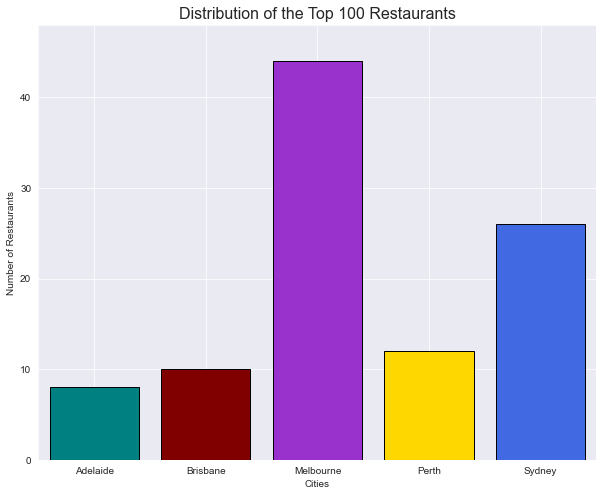

In [6]:
#Define the variables
x1 = [0,1,2,3,4]
y1 = city_df["Restaurant_id"]
colours = ['teal', 'maroon', 'darkorchid', 'gold', 'royalblue']

plt.bar(x1, y1, edgecolor='black', color=colours)

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(10, 8)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=medium)     
plt.rc('axes', titlesize=medium)     
plt.rc('xtick', labelsize=medium)   
plt.rc('ytick', labelsize=small)   
plt.rc('figure', titlesize=large)

#Add title, axis labels and gridlines
plt.title('Distribution of the Top 100 Restaurants')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.xticks(np.arange(5), ('Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney'))
plt.xlim(-0.5,len(city_df)-0.5)
plt.ylim(0,48)

#Save plot
plt.savefig("images/DistributionTop100.png")

### Analysis:
Among the top 100 restaurants in Austrlian (ranked by user rating and by number of votes),44 restaurants are located in Melbourne. This number if by far higher than the number of restaurants in Sydney with 26 restaurants.

# Analysis among the 500 restaurants
In this analysis we are going to compare the top 100 restaurants in each city and understand whether or not there is a difference in regards to their average user ratings, average cost for two and types of cuisines.


In [7]:
# Resource File (CSV)
df497 = pd.read_csv("output_data/Top_497.csv")
top_497 = df497.drop('Unnamed: 0', axis=1)
top_497.head()

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,224,"French, European"
1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese
3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


# Summary Statistics for user rating and average cost for two

In [8]:
#Group df by City
group_all_cities = top_497.groupby("City")
city_count = pd.DataFrame(group_all_cities["Restaurant_id"].count())

#Calculate the average user rating
user_average = pd.DataFrame(group_all_cities["User Rating"].mean())
city_count["User rating Average"] = user_average

#Calculate the median user rating
user_median = pd.DataFrame(group_all_cities["User Rating"].median())
city_count["User rating Median"] = user_median

#Calculate the standard deviation for user rating
user_var = pd.DataFrame(group_all_cities["User Rating"].var())
city_count["User rating Variance"] = user_var

#Calculate the standard deviation for user rating
user_stDev = pd.DataFrame(group_all_cities["User Rating"].std())
city_count["User rating Std Deviation"] = user_stDev

#Calculate the average user rating
Cost_average = pd.DataFrame(group_all_cities["Average Cost for two"].mean())
city_count["Average Cost"] = Cost_average

#Calculate the median user rating
Cost_median = pd.DataFrame(group_all_cities["Average Cost for two"].median())
city_count["Median Cost"] = Cost_median

#Calculate the standard deviation for user rating
Cost_var = pd.DataFrame(group_all_cities["Average Cost for two"].var())
city_count["Variance Cost"] = Cost_var

#Calculate the standard deviation for user rating
Cost_stDev = pd.DataFrame(group_all_cities["Average Cost for two"].std())
city_count["Std Deviation Cost"] = Cost_stDev

city_count.reset_index()

,City,Restaurant_id,User rating Average,User rating Median,User rating Variance,User rating Std Deviation,Average Cost,Median Cost,Variance Cost,Std Deviation Cost
0,Adelaide,98,4.394898,4.35,0.027293,0.165207,79.030612,75,2268.401115,47.627735
1,Brisbane,100,4.511000,4.50,0.013514,0.116250,72.730000,60,1799.330404,42.418515
2,Melbourne,100,4.668000,4.60,0.008461,0.091982,120.250000,90,10491.098485,102.426064
3,Perth,99,4.465657,4.40,0.021870,0.147884,82.090909,65,3145.634508,56.085956
4,Sydney,100,4.626000,4.60,0.013257,0.115137,98.050000,80,5989.340909,77.390832


In [9]:
#User rating average / Average cost /Median cost across all restaurants
User_rating = df497["User Rating"].mean()
Cost_average = df497["Average Cost for two"].mean()
Cost_median = df497["Average Cost for two"].median()

print(f" The average rating of the 500 restaurants in Australia is {User_rating:.2f}")
print(f" The average cost of the 500 restaurants in Australia is $ {Cost_average:.2f}")
print(f" The median cost of the 500 restaurants in Australia is ${Cost_median:.2f}")

 The average rating of the 500 restaurants in Australia is 4.53
 The average cost of the 500 restaurants in Australia is $ 90.49
 The median cost of the 500 restaurants in Australia is $70.00


### Analysis of the summary statistics:
Melbourne and Sydney have a slightly higher user rating than the other cities. 
Regarding the average cost, Melbourne seems more expensive and its standard deviation for average cost  is really high compare to other cities.

# Average user ratings per city

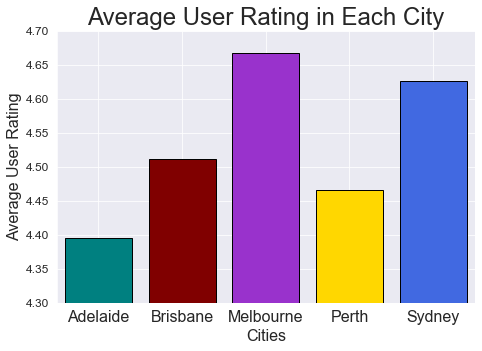

In [10]:
#Define the variables
x1 = [0,1,2,3,4]
y1 = city_count["User rating Average"]
colours = ['teal', 'maroon', 'darkorchid', 'gold', 'royalblue']

plt.bar(x1, y1, edgecolor='black', color=colours)

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(7.5, 5)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=medium)     
plt.rc('axes', titlesize=large)     
plt.rc('xtick', labelsize=small)   
plt.rc('ytick', labelsize=small)   
plt.rc('figure', titlesize=large)

#Add title, axis labels and gridlines
plt.title('Average User Rating in Each City')
plt.xlabel('Cities')
plt.ylabel('Average User Rating')
plt.xticks(np.arange(5), ('Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney'))
plt.xlim(-0.5,len(city_count)-0.5)
plt.ylim(4.3,4.7)

#Save plot
plt.savefig("images/AvUserRating500.png")

### Analysis
The average user rating in Melbourne's top 100 restaurants is slightly higher than Sydney's  top 100 restaurants. However we can see a bigger difference with the average user rating of the smaller cities.
Note: By taking the top 100 restaurants in each city we are actually not looking at the same proportion of restaurants across each city. It makes sense that the top 100 restaurants average rating is lower for Brisbane, Perth and Adelaide as these cities are smaller and have less restaurants than Melbourne and Sydney.

# Understanding the distribution of restaurants per user rating per city

In [11]:
RatingsperCity=top_497.groupby(['City'])['User Rating'].value_counts()
StackedRatings = RatingsperCity.unstack('User Rating').fillna(0)
StackedRatings

User Rating,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
City,,,,,,,,
Adelaide,16.0,33.0,20.0,13.0,7.0,5.0,2.0,2.0
Brisbane,0.0,0.0,36.0,35.0,17.0,8.0,2.0,2.0
Melbourne,0.0,0.0,0.0,0.0,56.0,27.0,10.0,7.0
Perth,0.0,20.0,37.0,20.0,10.0,6.0,3.0,3.0
Sydney,0.0,0.0,0.0,27.0,42.0,16.0,8.0,7.0


In [12]:
#Define the variables
R42 = [16.0,0,0,0,0]
R43 = [33.0,0,0,20.0,0]
R44 = [20.0,36.0,0,37.0,0]
R45 = [13.0,35.0,0,20.0,27.0]
R46 = [7.0,17.0,56.0,10.0,42.0]
R47 = [5.0,8.0,27.0,6.0,16.0]
R48 = [2.0,2.0,10.0,3.0,8.0]
R49 = [2.0,2.0,7.0,3.0,7.0]

colours = ['slategray', 'lightslategray', 'lightsteelblue', 'thistle', 'violet', 'orchid', 'mediumorchid', 'darkorchid', 'indigo']

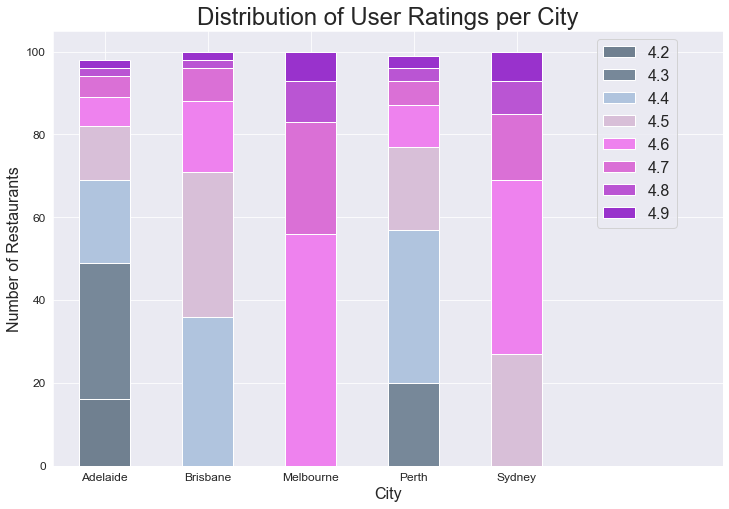

In [13]:
StackedRatings.plot(kind='bar', stacked=True, color=colours, legend=False, rot=0).legend(bbox_to_anchor=(0.8, 1))

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Set textual properties
plt.title("Distribution of User Ratings per City")
plt.ylabel("Number of Restaurants")
plt.xlim(-0.5,len(StackedRatings)+1)
plt.ylim(0,105)

#Save plot
plt.savefig("images/Distribution of User Ratings per City.png")

### Analysis
In this graph we can see Melbourne is the only city having all top 100 restaurants equal or above 4.6 user rating.

# Average cost for two per city

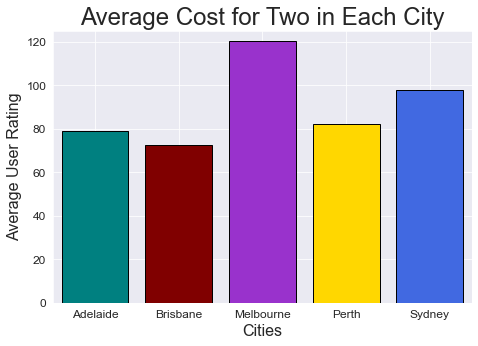

In [14]:
#Define the variables
x1 = [0,1,2,3,4]
y1 = city_count["Average Cost"]
colours = ['teal', 'maroon', 'darkorchid', 'gold', 'royalblue']

plt.bar(x1, y1, edgecolor='black', color=colours)

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(7.5, 5)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=medium)     
plt.rc('axes', titlesize=large)     
plt.rc('xtick', labelsize=small)   
plt.rc('ytick', labelsize=small)   
plt.rc('figure', titlesize=large)

#Add title, axis labels and gridlines
plt.title('Average Cost for Two in Each City')
plt.xlabel('Cities')
plt.ylabel('Average User Rating')
plt.xticks(np.arange(5), ('Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney'))
plt.xlim(-0.5,len(city_count)-0.5)
plt.ylim(0,125)

#Save plot
plt.savefig("images/AvCost500.png")

### Analysis
While Melbourne can show its top 100 restaurants are better rated, its average cost for two is higher than any other city. $40 above the smaller cities and $20 above Sydney.

# Median of the cost for two per city

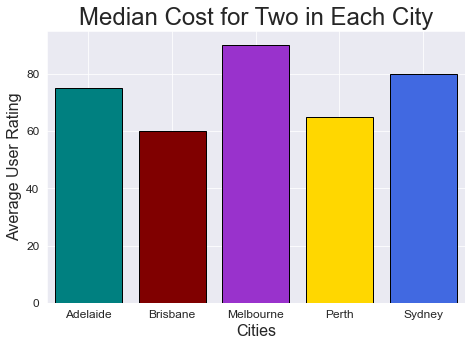

In [15]:
#Define the variables
x1 = [0,1,2,3,4]
y1 = city_count["Median Cost"]
colours = ['teal', 'maroon', 'darkorchid', 'gold', 'royalblue']

plt.bar(x1, y1, edgecolor='black', color=colours)

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(7.5, 5)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=medium)     
plt.rc('axes', titlesize=large)     
plt.rc('xtick', labelsize=small)   
plt.rc('ytick', labelsize=small)   
plt.rc('figure', titlesize=large)

#Add title, axis labels and gridlines
plt.title('Median Cost for Two in Each City')
plt.xlabel('Cities')
plt.ylabel('Average User Rating')
plt.xticks(np.arange(5), ('Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney'))
plt.xlim(-0.5,len(city_count)-0.5)
plt.ylim(0,95)

#Save plot
plt.savefig("images/MedianCost500.png")

# Analysis
The median cost for two people in Melbourne is also higher than the median cost in other cities. It means 50% of restaurants in Melbourne cost more than 90 dollars for two people. Sydney median cost is 80 dollars and the other cities below 80 dollars.

# Box plot on the average cost
To understand better how the data is distributed we are going to do box plots for the average cost for two.

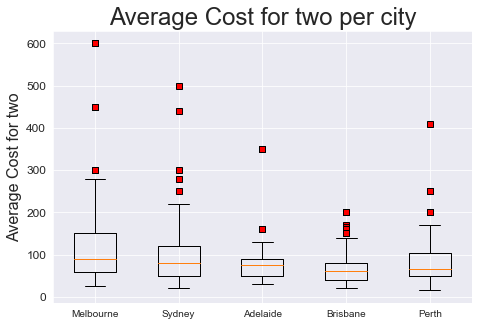

In [16]:
# Generate a box plot of the average cost for two across the five cities
Avg_Melbourne = top_497.loc[df497["City"]=="Melbourne","Average Cost for two"]
Avg_Sydney = top_497.loc[df497["City"]=="Sydney","Average Cost for two"]
Avg_Adelaide = top_497.loc[df497["City"]=="Adelaide","Average Cost for two"]
Avg_Brisbane = top_497.loc[df497["City"]=="Brisbane","Average Cost for two"]
Avg_Perth = top_497.loc[df497["City"]=="Perth","Average Cost for two"]

all_cities_data = [Avg_Melbourne,Avg_Sydney, Avg_Adelaide,Avg_Brisbane,Avg_Perth]
all_cities = ["Melbourne", "Sydney", "Adelaide", "Brisbane", "Perth"]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
fig1.set_size_inches(7.5, 5)
ax1.set_title('Average Cost for two per city')
ax1.set_xticklabels(all_cities, rotation=0, fontsize=10)
ax1.set_ylabel('Average Cost for two')
ax1.boxplot(all_cities_data, flierprops=red_square)
#Save image 
plt.savefig('images/Outliers per city.png')
plt.show()

### Analysis
The box plot for Melbourne shows the top interquartile is very high meaning the top end restaurants cost between 150 and almost 300 dollars for two. It's not only the outliers that bring the average cost for two really high.

# Scatter plot of the average cost two vs average rating across the cities

In [17]:
#Define variables
x1 = top_497.loc[top_497["City"]=='Sydney',"Average Cost for two"]
y1 = top_497.loc[top_497["City"]=='Sydney',"User Rating"]
x2 = top_497.loc[top_497["City"]=='Melbourne',"Average Cost for two"]
y2 = top_497.loc[top_497["City"]=='Melbourne',"User Rating"]
x3 = top_497.loc[top_497["City"]=='Brisbane',"Average Cost for two"]
y3 = top_497.loc[top_497["City"]=='Brisbane',"User Rating"]
x4 = top_497.loc[top_497["City"]=='Perth',"Average Cost for two"]
y4 = top_497.loc[top_497["City"]=='Perth',"User Rating"]
x5 = top_497.loc[top_497["City"]=='Adelaide',"Average Cost for two"]
y5 = top_497.loc[top_497["City"]=='Adelaide',"User Rating"]

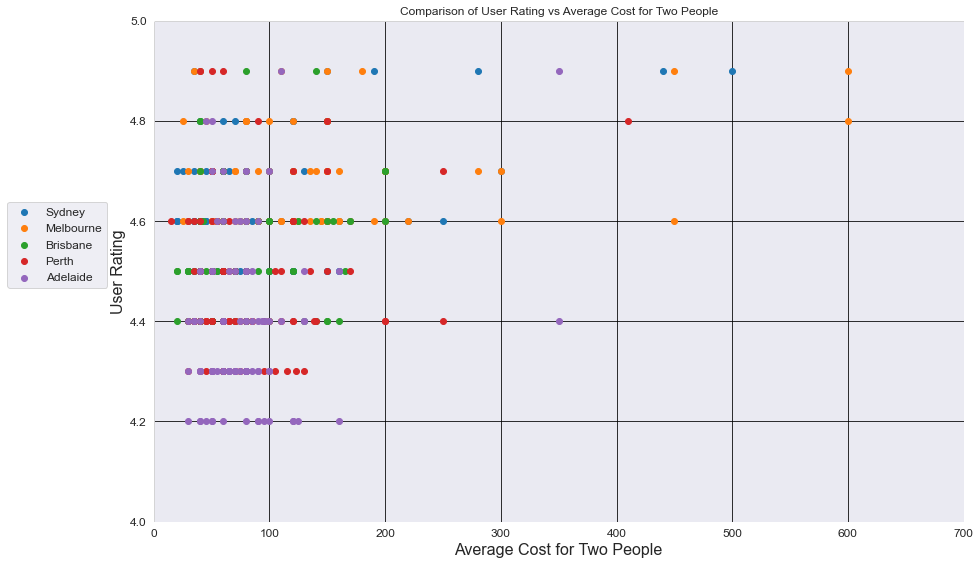

In [18]:
#Specify plot to be a scatter plot and add variables
plt.scatter(x1,y1, label='Sydney')
plt.scatter(x2,y2, label='Melbourne')
plt.scatter(x3,y3, label='Brisbane')
plt.scatter(x4,y4, label='Perth')
plt.scatter(x5,y5, label='Adelaide')

#Set plot x and y axis limits
plt.axis([0, 700, 4.0, 5.0])

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(15, 12)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=small)     
plt.rc('axes', titlesize=small)     
plt.rc('axes', labelsize=small) 
plt.rc('xtick', labelsize=small)   
plt.rc('ytick', labelsize=small)   
plt.rc('legend', fontsize=small)  
plt.rc('figure', titlesize=large)

#Add legend and set graph and legend position
#plt.legend(loc='best')
plt.subplots_adjust(left=0.15, bottom=0.3)
plt.legend(bbox_to_anchor=(-0.05, 0.65), loc='upper right')

#Add title, axis labels and gridlines
plt.title('Comparison of User Rating vs Average Cost for Two People')
plt.xlabel('Average Cost for Two People')
plt.ylabel('User Rating')
plt.grid(which='major', linestyle='-', color='black')

#Save plot
plt.savefig("images/scatter_500.png")

# Analysis of types of cuisines

In [19]:
#Reorganising columns so Cuisine is at the end of the dataframe - dropping unnamed.
new_df = top_497[['Restaurant_id',"Name", "Locality", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines"]]
#Separating Cuisines data by comma and placing the data into new columns
df = pd.concat([new_df, new_df['Cuisines'].str.split(', ', expand=True)], axis=1)
df.columns = ['Restaurant_id',"Name", "Locality", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines", 
              "Cuisine_1","Cuisine_2","Cuisine_3","Cuisine_4","Cuisine_5","Cuisine_6","Cuisine_7","Cuisine_8"]
df.head()

,Restaurant_id,Name,Locality,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,Cuisines,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,15547004,Restaurant Hubert,CBD,Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,"French, European",French,European,None,None,None,None,None,None
1,16558798,Quay,Circular Quay,Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,Modern Australian,Modern Australian,None,None,None,None,None,None,None
2,16559171,Tetsuya's,CBD,Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,Japanese,Japanese,None,None,None,None,None,None,None
3,16569454,LuMi Bar & Dining,Pyrmont,Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,"Italian, Japanese",Italian,Japanese,None,None,None,None,None,None
4,15545439,Manpuku,Chatswood,Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,"Japanese, Ramen",Japanese,Ramen,None,None,None,None,None,None


# Grouping sub-categories of cuisines with the main categories

In [20]:
# Combining similar cuisines together
df = df.replace({"Sushi": "Japanese", "Japanese BBQ": "Japanese", "Ramen" : "Japanese",
                 "Pizza": "Italian", "Australian": "Modern Australian", "Contemporary":"Modern Australian",
                "Mediterranean" : "European", "European/Mediterranean": "European",
                 "Spanish" : "Spanish/Tapas", "Tapas" : "Spanish/Tapas",
                 "Burger" : "American/Burger", "American": "American/Burger",  
                 "Korean BBQ":"Korean", "Asian Fusion": "Asian", "Modern European":"European/Mediterranean", 
                 "Fast Food":"American/Burger", "Cantonese":"Chinese", "Lebanese":"Middle Eastern", "Turkish":"Middle Eastern", 
                 "Middle East": "Middle Eastern"
                     })

cuisines2 = df["Cuisine_1"].value_counts()
cuisines2

Japanese                  82
Italian                   59
Modern Australian         43
Asian                     30
Thai                      27
American/Burger           23
European                  22
Indian                    21
Middle Eastern            21
Chinese                   17
Spanish/Tapas             17
Vietnamese                17
French                    16
Bar Food                  10
Greek                     10
Korean                     8
Seafood                    8
Desserts                   6
Malaysian                  6
Cafe Food                  5
BBQ                        4
Steak                      4
Coffee and Tea             4
Latin American             3
African                    3
Mexican                    3
Vegetarian                 3
Taiwanese                  2
European/Mediterranean     2
Bakery                     2
Healthy Food               2
Indonesian                 2
Fish and Chips             2
Sandwich                   2
Portuguese    

In [21]:
#Selecting the top ten cuisines we are interested in:
final_df = df.loc[(df["Cuisine_1"] == "Japanese") |
                                  (df["Cuisine_1"] == "Asian") |
                                  (df["Cuisine_1"] == "Italian")|
                                   (df["Cuisine_1"] == "Modern Australian") |
                                   (df["Cuisine_1"] == "European") |
                  (df["Cuisine_1"] == "American/Burger") |
                  (df["Cuisine_1"] == "Indian") |
                  (df["Cuisine_1"] == "Vietnamese") |
                  (df["Cuisine_1"] == "Spanish/Tapas") |
                  (df["Cuisine_1"] == "Middle Eastern") 
                                  ]
final_df["Cuisine_1"].count()

335

### Analysis of the cuisines:
As we are grouping the cuisines and we are focusing on the ten first categories, we are going to visualise the 335 restaurants out of 500, which represents 67%.

In [22]:
RatingsperCity=top_497.groupby(['City'])['User Rating'].value_counts()
StackedRatings = RatingsperCity.unstack('User Rating').fillna(0)
StackedRatings

User Rating,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
City,,,,,,,,
Adelaide,16.0,33.0,20.0,13.0,7.0,5.0,2.0,2.0
Brisbane,0.0,0.0,36.0,35.0,17.0,8.0,2.0,2.0
Melbourne,0.0,0.0,0.0,0.0,56.0,27.0,10.0,7.0
Perth,0.0,20.0,37.0,20.0,10.0,6.0,3.0,3.0
Sydney,0.0,0.0,0.0,27.0,42.0,16.0,8.0,7.0


In [23]:
#Breakdown of restaurants per user ratings across cities
cuisine2=final_df.groupby(['Cuisine_1'])['City'].value_counts().sort_values(ascending=False)
stackedcuisines = cuisine2.unstack('City').fillna(0)
stackedcuisines

City,Adelaide,Brisbane,Melbourne,Perth,Sydney
Cuisine_1,,,,,
American/Burger,5.0,6.0,3.0,6.0,3.0
Asian,10.0,6.0,7.0,4.0,3.0
European,7.0,4.0,3.0,8.0,0.0
Indian,8.0,7.0,1.0,4.0,1.0
Italian,14.0,12.0,11.0,11.0,11.0
Japanese,4.0,14.0,18.0,21.0,25.0
Middle Eastern,3.0,4.0,7.0,3.0,4.0
Modern Australian,9.0,8.0,9.0,6.0,11.0
Spanish/Tapas,3.0,3.0,4.0,6.0,1.0


In [24]:
#Define the variables
Adelaide = stackedcuisines["Adelaide"]
Brisbane = stackedcuisines["Brisbane"]
Melbourne = stackedcuisines["Melbourne"]
Perth = stackedcuisines["Perth"]
Sydney = stackedcuisines["Sydney"]

colours = ['teal', 'maroon', 'darkorchid', 'gold', 'royalblue']

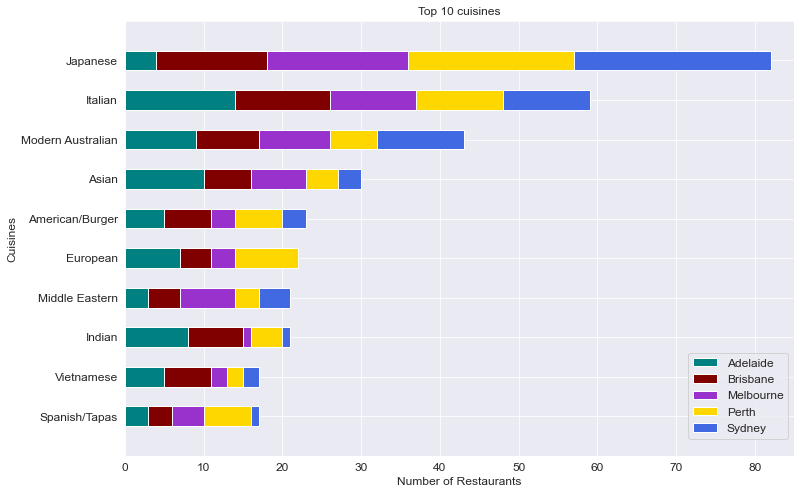

In [25]:
stackedcuisines['Total'] = stackedcuisines.apply('sum', axis=1)
stackedcuisines.sort_values('Total')\
        .drop(columns=['Total'])\
        .plot(kind='barh', stacked=True, color=colours, legend=False, rot=0).legend(bbox_to_anchor=(1, 0.25))

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Set textual properties
plt.title("Top 10 cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.xlim(0,85)
plt.ylim(-1,len(stackedcuisines))

#Save plot
plt.savefig("images/Cuisines.png")

### Top 10 cuisines
The main cuisines represented in the top restaurants are Japanese, Italian and Modern Australian. The variety of cuisines exist across the five cities.
However please note the category 'Asian' can be misrepresented as it can include several types of Asian cuisines (e.g. Vietnamese, Chinese, Japanese). If we had time we would have gone deeper and reworked this category with the second type of cuisine. As an example you can see below the break down of second cuisines for the "Asian" restaurants.

In [26]:
#Example of second cuisines listed in the Asian restaurants:
Asian = df.loc[df["Cuisine_1"]=="Asian",["Cuisine_2"]]
Asian

,Cuisine_2
6,Vietnamese
37,Chinese
76,Vietnamese
108,Spanish/Tapas
122,Japanese
135,Fusion
143,Thai
153,Fusion
157,Vegan
173,Chinese
